### Kernel SVM 

* When we did a linear kernel SVM, we were able to successfully demonstate how it can be used to separate distinct categories via a straight line
* But suppose we are dealt a dataset of observations where it is not possible to separate the two categories (let's say we only have two categories in this scenario) via a straight line, what do we do?

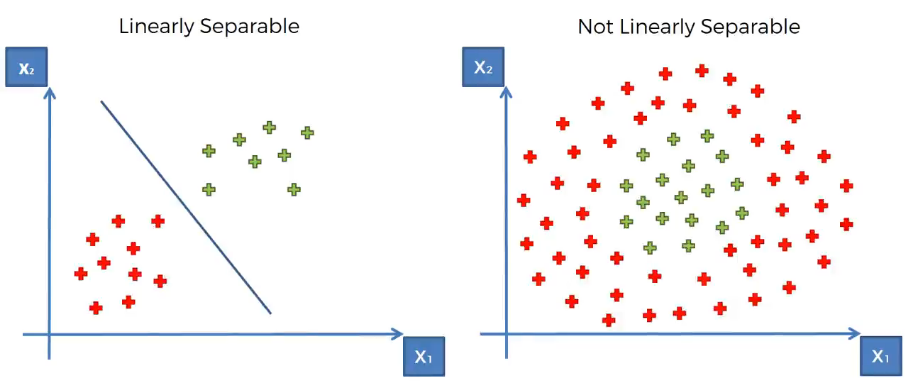

In [1]:
from IPython.display import Image, display
display(Image(filename='ksvm.png', width=750, height=300, embed=True))

<div style="text-align: right"> &copy; SuperDataScience </div>

* Strategy:
    1.  take our non-linearly separable dataset, and map it to higher dimension
    2.  mapping to higher dimension will allow us to get a linearly separable dataset
    3.  then we can invoke SVM algorithm
    4.  build a decision boundary for our dataset
    5.  Project all of that back into our original dimensions

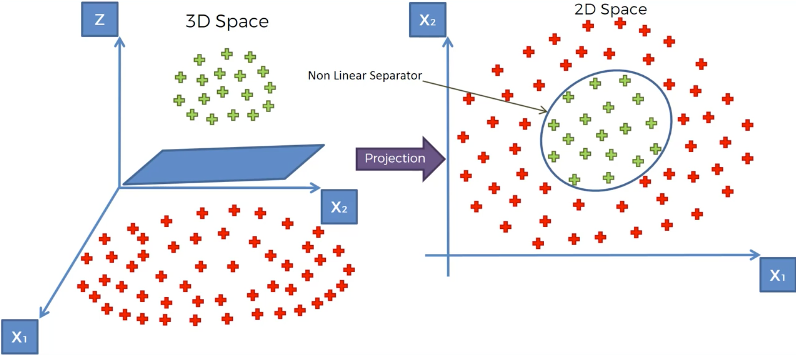

In [2]:
display(Image(filename='ksvm_proj.png', width=750, height=300, embed=True))

<div style="text-align: right"> &copy; SuperDataScience </div>

* catch: mapping to higher dimension demands a lot of computational intensity
* catch is solved via kernel 'trick'

#### Gaussian RBF Kernel

$$
\begin{equation}
\mathbf{K(\overrightarrow{x},\;\overrightarrow{l^i})} \;\; = \Large e^{-\frac{\mathopen||\overrightarrow{x}-\overrightarrow{l^i}\mathclose||^2}{2\sigma^2}} \\
\end{equation}
$$

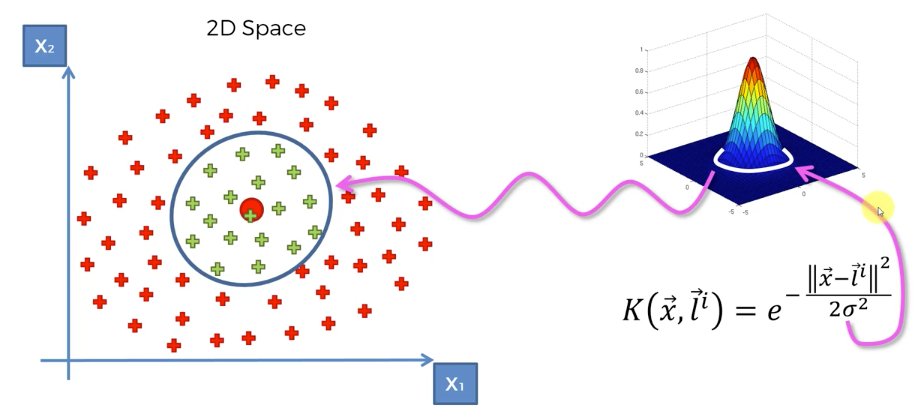

In [4]:
display(Image(filename='ksvm_gauss.png', width=750, height=300, embed=True))

<div style="text-align: right"> &copy; SuperDataScience </div>

#### Types of kernel functions

$$
\begin{equation}
\mathbf{Gaussian\;RBF\;Kernel:}\;K(\overrightarrow{x},\;\overrightarrow{l^i}) \;\; = \Large e^{-\frac{\mathopen||\overrightarrow{x}-\overrightarrow{l^i}\mathclose||^2}{2\sigma^2}} \\
\mathbf{Sigmoid\;Kernel:}\;K(X,Y) \;\; = tanh(\gamma \cdot X^T Y + r) \\
\mathbf{Polynomial\;Kernel:}\;K(X,Y) \;\; = (\gamma \cdot X^T Y + r)^d,\gamma>0 \\
\end{equation}
$$
(see section 17 lecture 103 for graphs of kernel functions & 3D versions of them)

#### Implementation

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
print("dataset columns: " + str(dataset.columns.tolist()))
X = dataset.iloc[:, [2, 3]].values
print("X shape: " + str(X.shape))
y = dataset.iloc[:, 4].values
print("y shape: " + str(y.shape))

dataset columns: ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
X shape: (400, 2)
y shape: (400,)


In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))

X_train shape: (300, 2)
X_test shape: (100, 2)


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Fitting Kernel SVM classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
# Predicting the Kernel SVM Test set results
y_pred = classifier.predict(X_test)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 3, 29]])

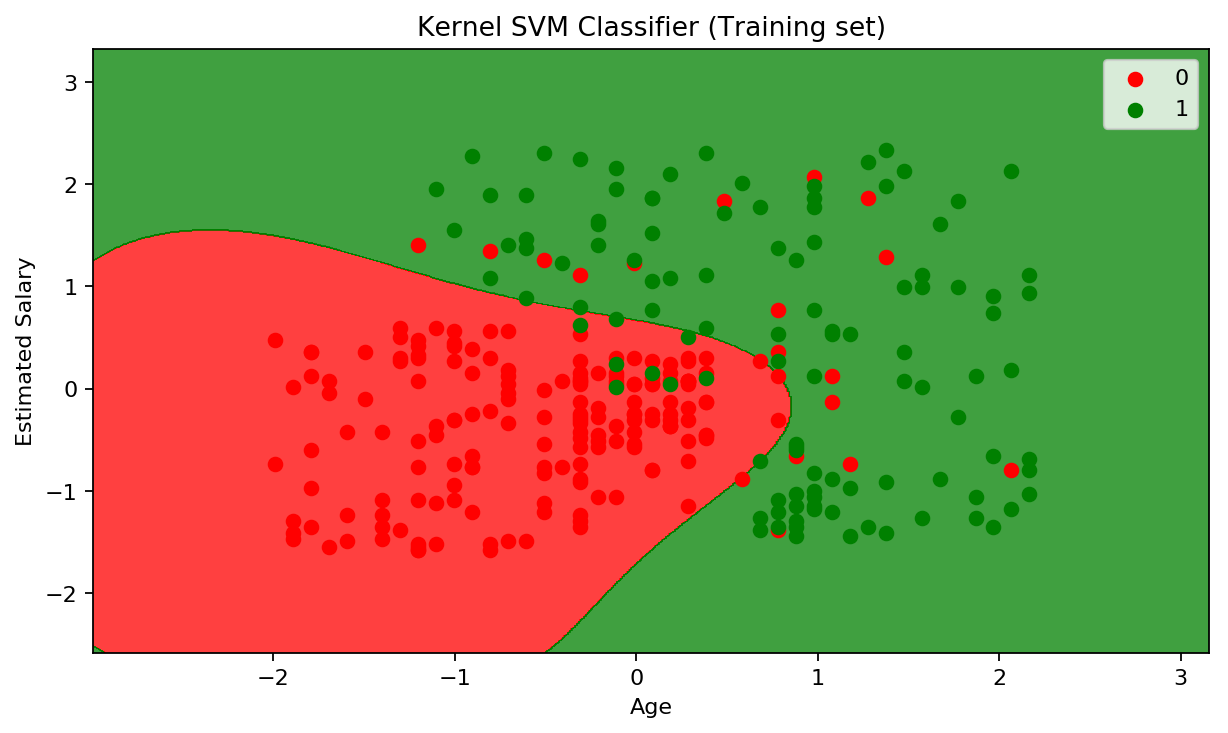

In [23]:
# Visualising the Kernel SVM Training set results
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

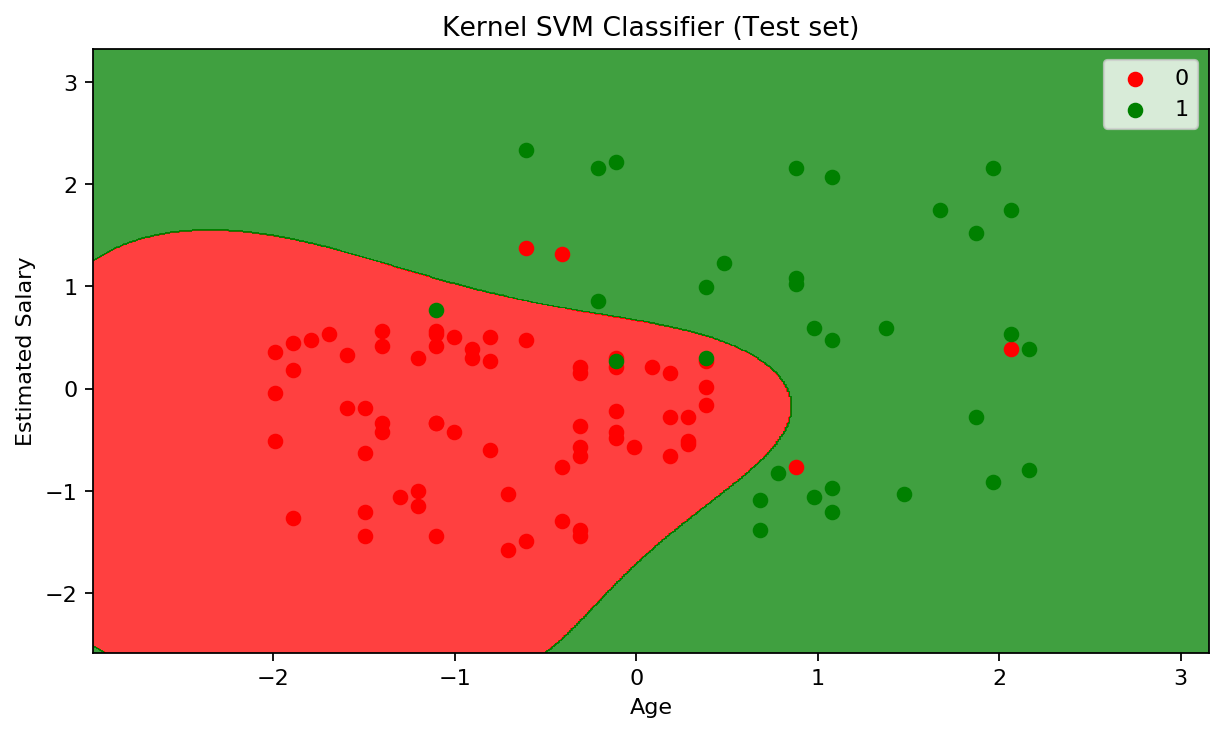

In [24]:
# Visualising the Kernel SVM Test set results
fig=plt.figure(figsize=(9, 5), dpi= 80, facecolor='w', edgecolor='k')

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Wooo! Looks great!